In [1]:
import os, glob
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# folder_path = '2_env_similar_shared'
# folder_path = '3_env_diff_shared'
# folder_path = '3_env_diff_softmod_shallow'
folder_path = '3_env_diff_softmod_deep/Full Data'

num_env = 3
name_env = ['CreateLevelPush', 'CreateLevelObstacle', 'CreateLevelLadder']
mean_reward = [[] for i in range(num_env)]
for filename in glob.glob(os.path.join(folder_path, '*.out')):
    with open(filename, 'r') as f:
        print(filename)
        lines = f.readlines()
        cur_env = -1
        
        for line in lines:
            if line.strip().startswith('evaluating for env'):
                env = line.split(' ')[-1][:-4]
                for i in range(num_env):
                    if env == name_env[i]:
                        cur_env = i
                       
            if line.strip().startswith('Evaluation using 20 episodes'):
                mean_reward[cur_env].append(float(line[-9:].strip()))
        
        for i in range(num_env):
            print(len(mean_reward[i]), end = ' ')
        print()

3_env_diff_softmod_deep/Full Data\slurm-23004388.out
115 115 115 
3_env_diff_softmod_deep/Full Data\slurm-23006081.out
230 230 230 
3_env_diff_softmod_deep/Full Data\slurm-23013314.out
346 346 346 
3_env_diff_softmod_deep/Full Data\slurm-23016290.out
461 461 461 
3_env_diff_softmod_deep/Full Data\slurm-23020752.out
576 576 576 
3_env_diff_softmod_deep/Full Data\slurm-23025265.out
691 691 691 
3_env_diff_softmod_deep/Full Data\slurm-23039599.out
762 762 762 
3_env_diff_softmod_deep/Full Data\slurm-23041121.out
781 781 781 


In [3]:
x = [[] for i in range(num_env)]
for i in range(num_env):
    x[i] = [j for j in range(len(mean_reward[i]))]
    
for i in range(num_env):
    print(len(x[i]), end = ' ')
print()

781 781 781 


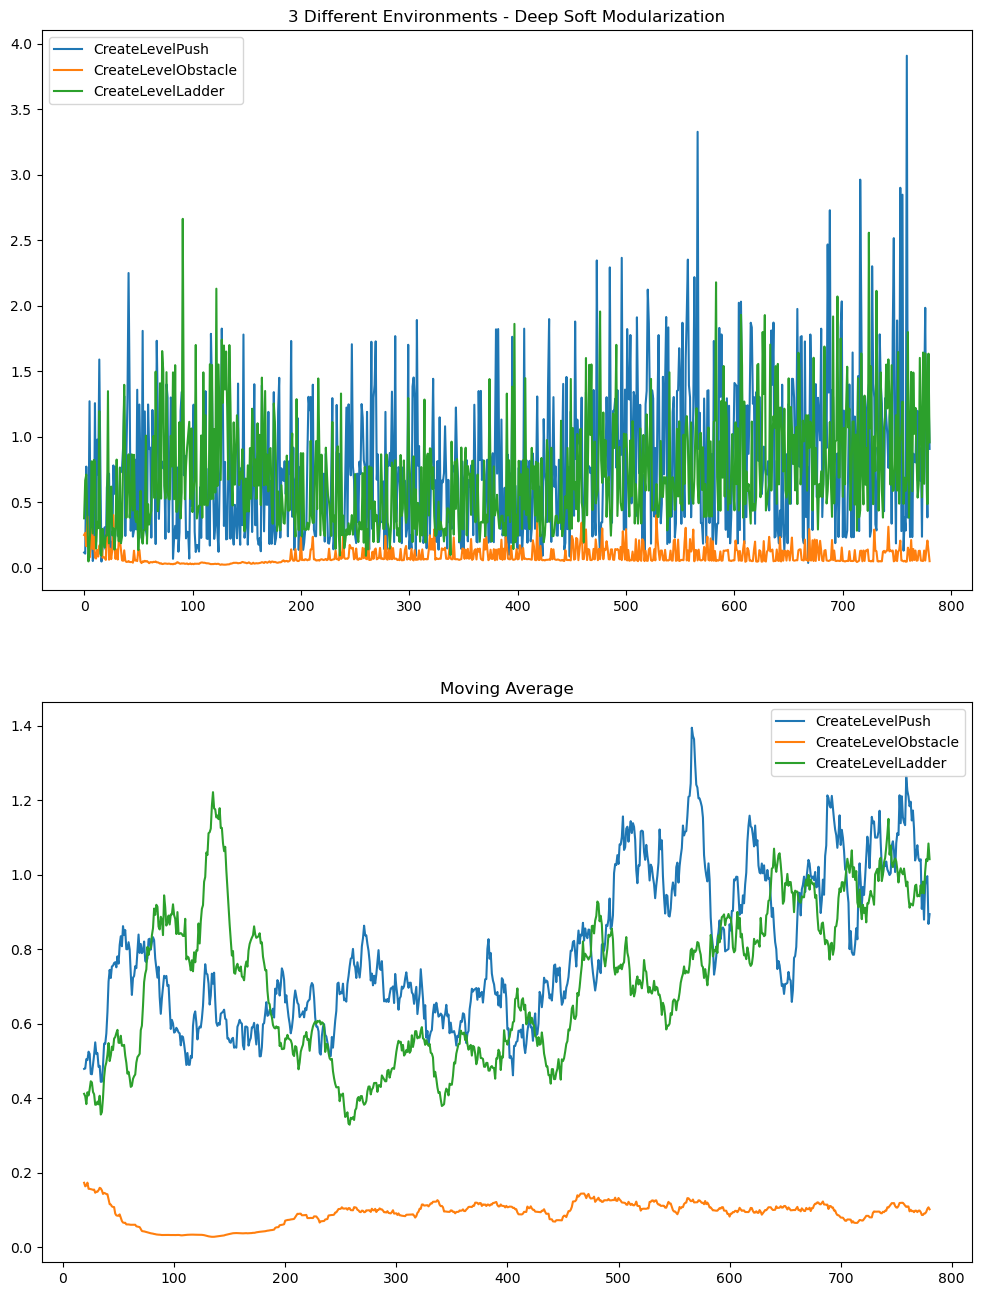

In [4]:
fig, ax = plt.subplots(2, 1, figsize = (12, 16))
for i in range(num_env):
    ax[0].plot(x[i], mean_reward[i], label = name_env[i])
    ax[0].set_title('3 Different Environments - Deep Soft Modularization')
    ax[0].legend()
    
for i in range(num_env):
    ax[1].plot(x[i], pd.Series(mean_reward[i]).rolling(20).mean(), label = name_env[i])
    ax[1].set_title('Moving Average')
    ax[1].legend()